In [44]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt


In [45]:
cwd = os.getcwd()
for root_file, sub_dir, files in os.walk(cwd):
    for file in files:
        print(file)
        

insurance.csv
Assignment5_dph37.ipynb
insurance_cleaned.csv
Assignment5_dph37-checkpoint.ipynb


### Pandas and file read

In [46]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c240b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ad49470>]], dtype=object)

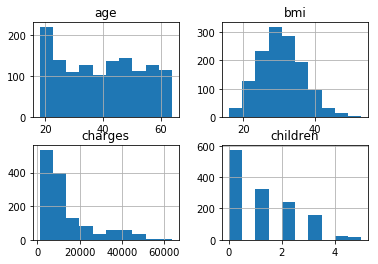

In [47]:
df.hist()

In [48]:
df.describe()

,age,bmi,children,charges
count,1335.000000,1338.000000,1338.000000,1334.000000
mean,39.200000,30.663397,1.094918,13246.832501
std,14.040945,6.098187,1.205493,12113.712242
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4724.369462
50%,39.000000,30.400000,1.000000,9333.014350
75%,51.000000,34.693750,2.000000,16547.261587
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
df.isnull().sum()

age         3
sex         3
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64

#### View the data

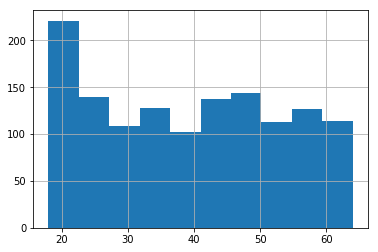

In [50]:
df['age'].hist()

### Cleaning the data:

In [51]:
#skewed right
df['age'].fillna(df['age'].median(), inplace = True)

In [52]:
df['age'].isnull().sum()

0

In [53]:
df['age'].to_frame().applymap(np.isreal).head()

,age
0,True
1,True
2,True
3,True
4,True


In [54]:
df.isnull().sum()

age         0
sex         3
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64

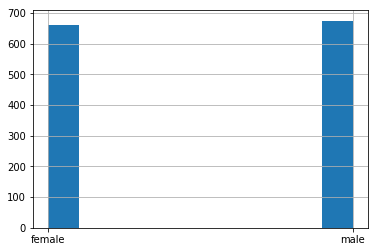

In [55]:
#using the mode to replace the missing values:
df['sex'].hist()

In [56]:
# df.groupby('sex').agg('count')
# df['sex'].mode()
df.groupby('sex').agg({'sex':'count'})

,sex
sex,
female,660
male,675


In [57]:
df['sex'].fillna('male', inplace = True)

In [58]:
df['sex'].isnull().sum()

0

In [59]:
df['sex'].dtypes

dtype('O')

In [60]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      5
charges     4
dtype: int64

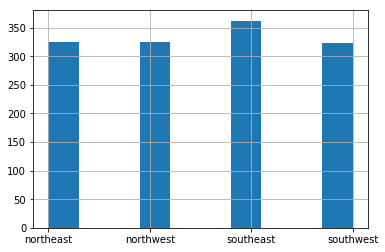

In [61]:
df['region'].hist()

In [62]:
df['region'].mode()[0]

'southeast'

In [63]:
df['region'].fillna(df['region'].mode()[0], inplace = True)

In [64]:
df['region'].isnull().sum()

0

In [65]:
df['region'].dtype

dtype('O')

In [66]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     4
dtype: int64

In [67]:
#using the numpy library to confirm all enties are numers
df['charges'].to_frame().applymap(np.isreal).head()

,charges
0,True
1,True
2,True
3,True
4,True


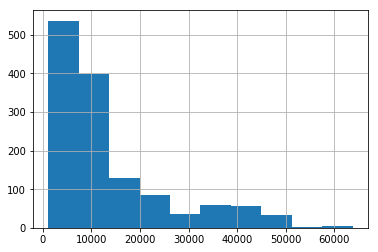

In [68]:
df['charges'].hist()

In [69]:
#skewed right:
df['charges'].fillna(df['charges'].median(), inplace = True)

In [70]:
df['charges'].isnull().sum()

0

### Null values set to valid data

In [71]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
df['children'].to_frame().applymap(np.isreal).head()

,children
0,True
1,True
2,True
3,True
4,True


In [73]:
#see if all string data is truly a string:
df['smoker'].to_frame().applymap(type).eq(str).all()

smoker    True
dtype: bool

In [74]:
df['region'].to_frame().applymap(type).eq(str).all()

region    True
dtype: bool

In [75]:
df['sex'].to_frame().applymap(type).eq(str).all()

sex    True
dtype: bool

In [76]:
df.to_csv('insurance_cleaned.csv')